# **DATA.py**

buat debug data.py

print(self._id2label)
print(self.imgs)
print(self.__getitem__(100))
hmm = self.imgs[10]
print(hmm)
print(self.id(hmm))
print(self.camera(hmm))

di data.py jangan lupa di akhir diberi Data()

https://stackoverflow.com/questions/50002543/what-are-transforms-in-pytorch-used-for

In [ ]:

for (i, e) in enumerate(['tiger','lion']):    # i is bound to index, e bound to each letter
        print(i, 'is the index for', e)
        for k in e:
          print(k)

0 is the index for tiger
t
i
g
e
r
1 is the index for lion
l
i
o
n



        for idx, path in enumerate(data_source.imgs):
            _id = data_source.id(path)
            print(self._id2index,idx)
            self._id2index[_id].append(idx)
        print(len(self._id2index))  

        menambahkan index pada setiap id 

# **CROSS ENTROPY**

In [67]:
import torch
import torch.nn as nn
loss = nn.CrossEntropyLoss()
y_pred_good= torch.tensor([[0.1, 1.0, 2.1], [2.0,0.1,0.1], [0.1,3.0,0.1]],requires_grad=True)
sftmx = nn.Softmax(dim=1)
sft=sftmx(y_pred_good)
print(sft)
y_pred_bad= torch.tensor([[2.1, 1.0, 0.1], [0.1,1.1,2.1], [0.1,-0.2,0.1]],requires_grad=True)
sftmx = nn.Softmax(dim=1)
sft=sftmx(y_pred_bad)
print(sft)
y = torch.tensor([2,0,1])
output = loss(y_pred_good, y)
print(output)
 
output = loss(y_pred_bad, y)
print(output)
output.backward()

tensor([[0.0922, 0.2267, 0.6811],
        [0.7697, 0.1151, 0.1151],
        [0.0496, 0.9009, 0.0496]], grad_fn=<SoftmaxBackward>)
tensor([[0.6811, 0.2267, 0.0922],
        [0.0900, 0.2447, 0.6652],
        [0.3649, 0.2703, 0.3649]], grad_fn=<SoftmaxBackward>)
tensor(0.2500, grad_fn=<NllLossBackward>)
tensor(2.0333, grad_fn=<NllLossBackward>)


 https://medium.com/swlh/cross-entropy-loss-in-pytorch-c010faf97bab

In [65]:
import torch
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()
inp= torch.tensor([[ 1.4775,  0.7022,  0.7499, -0.7535, -1.4983, -2.3193, -0.6166, -2.3302,-0.8847, -0.1915],[ 1.4775,  0.7022,  0.7499, -0.7535, -1.4983, -2.3193, -0.6166, -2.3302,-0.8847, -0.1915]],requires_grad=True)
sftmx = nn.Softmax(dim=1)
sft=sftmx(inp)
print(sft)
print(torch.tensor([2]))
y = torch.tensor([2,2])
r = torch.tensor([2,0])
e = torch.tensor([0,0])
loss_fn = nn.CrossEntropyLoss()
print(loss_fn(inp,y))
print(loss_fn(inp,r))
print(loss_fn(inp,e))

tensor([[0.3918, 0.1804, 0.1893, 0.0421, 0.0200, 0.0088, 0.0483, 0.0087, 0.0369,
         0.0738],
        [0.3918, 0.1804, 0.1893, 0.0421, 0.0200, 0.0088, 0.0483, 0.0087, 0.0369,
         0.0738]], grad_fn=<SoftmaxBackward>)
tensor([2])
tensor(1.6647, grad_fn=<NllLossBackward>)
tensor(1.3009, grad_fn=<NllLossBackward>)
tensor(0.9371, grad_fn=<NllLossBackward>)


https://discuss.pytorch.org/t/how-exactly-should-i-understand-the-cross-entropy-loss-function/61183/2

# **TRIPLET LOSS**

In [ ]:
import torch
import torch.nn as nn
 
 
inputs= torch.tensor([[0., 0., 0.], [1., 1., 1.], [2., 2., 2.]])
 
ea= torch.tensor([[5., 5., 5.], [4., 4., 4.], [3., 3., 3.]])
inputs

tensor([[0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.]])

In [ ]:
ea.addmm_(1,-2, inputs, inputs.t())
ea

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This overload of addmm_ is deprecated:
	addmm_(Number beta, Number alpha, Tensor mat1, Tensor mat2)
Consider using one of the following signatures instead:
	addmm_(Tensor mat1, Tensor mat2, *, Number beta, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  """Entry point for launching an IPython kernel.


tensor([[  5.,   5.,   5.],
        [  4.,  -2.,  -8.],
        [  3.,  -9., -21.]])

https://pytorch.org/docs/stable/generated/torch.addmm.html

In [ ]:
import torch.nn as nn

ea= torch.tensor([[5., 5., 5.], [4., 4., 4.], [3., 3., 3.]])
inputs= torch.tensor([[0., 0., 0.], [1., 1., 1.], [2., 2., 2.]])
ww=inputs@inputs.t()
print(inputs)
print(ww)
print(ww*-2)
print(ea)


tensor([[0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.]])
tensor([[ 0.,  0.,  0.],
        [ 0.,  3.,  6.],
        [ 0.,  6., 12.]])
tensor([[ -0.,  -0.,  -0.],
        [ -0.,  -6., -12.],
        [ -0., -12., -24.]])
tensor([[5., 5., 5.],
        [4., 4., 4.],
        [3., 3., 3.]])


In [ ]:
torch.addmm(ea, inputs, inputs.t(),alpha=-2,beta=1)

tensor([[  5.,   5.,   5.],
        [  4.,  -2.,  -8.],
        [  3.,  -9., -21.]])

8. The operation of addmm_() is the same as the function of addmm(), the difference is that addmm_() has an inplace operation, that is, to modify the original object, that is, to assign the changed variable to the original variable. E.g:
1 × inputs + 1 ×（inputs_t @ inputs_t）

'''e and f = 1 * inputs + 1 * (inputs_t @ inputs_t)''' e = torch.addmm(inputs inputs_t, inputs_t) 


https://www.hotbak.net/key/addmm%E7%9A%84%E7%94%A8%E6%B3%95%E8%AF%A6%E8%A7%A3%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD%E6%82%B2%E6%81%8B%E8%8A%B1%E4%B8%B6%E6%97%A0%E5%BF%83.html

In [ ]:
import torch
import torch.nn as nn
triplet_loss = nn.TripletMarginLoss(margin=1.0)
ea= torch.tensor([[5., 5., 5.], [4., 4., 4.], [3., 3., 3.]],requires_grad=True)
eaa= torch.tensor([[6., 5., 5.], [4., 4., 4.], [3., 3., 3.]], requires_grad=True)
eaaa= torch.tensor([[7., 5., 5.], [4., 4., 4.], [3., 3., 3.]], requires_grad=True)
output = triplet_loss(ea, eaa, eaaa)
print(output)
output.backward()

tensor(0.6667, grad_fn=<MeanBackward0>)


 predict, fg_p1, fg_p2, fg_p3, l_p1, l_p2, l_p3, l0_p2, l1_p2, l0_p3, l1_p3, l2_p3  dimana fg_p1 sampai p3 adalah untuk tripletloss, 
 sisanya data ke 4 ke atas untuk fc 256(sisanya) dan 2048 (l_p1 sampai p3),tapi di paper gk direduksi gk kayak di coding

https://pytorch.org/docs/stable/generated/torch.clamp.html

https://pytorch.org/docs/stable/generated/torch.nn.MarginRankingLoss.html

In [ ]:
import torch
import torch.nn as nn


class TripletLoss(nn.Module):
    """Triplet loss with hard positive/negative mining.
    Reference:
    Hermans et al. In Defense of the Triplet Loss for Person Re-Identification. arXiv:1703.07737.
    Code imported from https://github.com/Cysu/open-reid/blob/master/reid/loss/triplet.py.
    Args:
        margin (float): margin for triplet.
    """

    def __init__(self, margin=0.3, mutual_flag=False):
        super(TripletLoss, self).__init__()
        self.margin = margin
        self.ranking_loss = nn.MarginRankingLoss(margin=margin)
        self.mutual = mutual_flag

    def forward(self, inputs, targets):
        """
        Args:
            inputs: feature matrix with shape (batch_size, feat_dim)
            targets: ground truth labels with shape (num_classes)
        """
        n = inputs.size(0)
        # inputs = 1. * inputs / (torch.norm(inputs, 2, dim=-1, keepdim=True).expand_as(inputs) + 1e-12)
        # Compute pairwise distance, replace by the official when merged
        dist = torch.pow(inputs, 2)
        print('dist di pow\n',dist)
        dist = dist.sum(dim=1, keepdim=True)
        print('dist di sum\n',dist)
        dist = dist.expand(n, n)
        print('dist di expand\n',dist)
        dist = dist + dist.t()
        print('dist di tambah tranpose\n',dist)
        dist.addmm_(1, -2, inputs, inputs.t())
        print('dist di addm\n',dist)
        dist = dist.clamp(min=1e-12).sqrt()  # for numerical stability
        print('dist di clamp\n',dist)
        # For each anchor, find the hardest positive and negative
        mask = targets.expand(n, n).eq(targets.expand(n, n).t())
        print('nilai kebenaran dari label mask\n',mask)
        dist_ap, dist_an = [], []
        for i in range(n):
            dist_ap.append(dist[i][mask[i]].max().unsqueeze(0))
            dist_an.append(dist[i][mask[i] == 0].min().unsqueeze(0))
            print(dist[i][mask[i]])
        dist_ap = torch.cat(dist_ap)
        print('dist_ap',dist_ap)
        dist_an = torch.cat(dist_an)
        print('dist_an',dist_an)
        # Compute ranking hinge loss
        y = torch.ones_like(dist_an)
        print('torchones',y)
        loss = self.ranking_loss(dist_an, dist_ap, y)
        if self.mutual:
            return loss, dist
        return loss


In [ ]:
TRiplet_loss = TripletLoss(margin=1.2)
y_pred_good= torch.tensor([[1.0, 1.0],[1.0, -1.0],[2.0,1.0], [-7.0,8.1], [-2,-3]],requires_grad=True)
y = torch.tensor([2,2,2,1,1]) # 5 data
output = TRiplet_loss(y_pred_good, y)
print(output)

dist di pow
 tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 4.0000,  1.0000],
        [49.0000, 65.6100],
        [ 4.0000,  9.0000]], grad_fn=<PowBackward0>)
dist di sum
 tensor([[  2.0000],
        [  2.0000],
        [  5.0000],
        [114.6100],
        [ 13.0000]], grad_fn=<SumBackward1>)
dist di expand
 tensor([[  2.0000,   2.0000,   2.0000,   2.0000,   2.0000],
        [  2.0000,   2.0000,   2.0000,   2.0000,   2.0000],
        [  5.0000,   5.0000,   5.0000,   5.0000,   5.0000],
        [114.6100, 114.6100, 114.6100, 114.6100, 114.6100],
        [ 13.0000,  13.0000,  13.0000,  13.0000,  13.0000]],
       grad_fn=<ExpandBackward>)
dist di tambah tranpose
 tensor([[  4.0000,   4.0000,   7.0000, 116.6100,  15.0000],
        [  4.0000,   4.0000,   7.0000, 116.6100,  15.0000],
        [  7.0000,   7.0000,  10.0000, 119.6100,  18.0000],
        [116.6100, 116.6100, 119.6100, 229.2200, 127.6100],
        [ 15.0000,  15.0000,  18.0000, 127.6100,  26.0000]],
       g

Sama label memperkecil jarak makanya di ambil max , Beda label memperbesar jarak makanya di ambil min

# **COBA SYNTAKS**

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

In [ ]:
import torch
import torch.nn as nn
m = nn.MaxPool2d(kernel_size=(3, 2))
input = torch.randn(2,2,3,4)
print(input)
print(input.size())
output = m(input)
print(output)

tensor([[[[-0.9812,  0.3855,  0.2510, -0.9923],
          [-0.1727, -0.9430,  1.1022, -1.1034],
          [-0.2841,  0.4878, -0.4000,  1.1365]],

         [[ 0.5679,  1.0717, -0.5675,  2.6804],
          [ 1.0652, -0.4314,  0.8013,  2.0810],
          [-1.4966, -0.6176, -0.4732, -0.5327]]],


        [[[ 0.1643, -2.0622, -0.8288,  0.2142],
          [-0.2362, -1.2382,  0.2597,  0.5305],
          [-0.1789,  0.1965, -0.8482, -0.2570]],

         [[ 0.0303,  1.1374,  0.7585,  1.1468],
          [-0.2108,  0.3444,  0.1710, -1.0155],
          [-1.8845,  0.7072,  1.4033,  0.1864]]]])
torch.Size([2, 2, 3, 4])
tensor([[[[0.4878, 1.1365]],

         [[1.0717, 2.6804]]],


        [[[0.1965, 0.5305]],

         [[1.1374, 1.4033]]]])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


https://pytorch.org/docs/stable/generated/torch.index_select.html

In [ ]:
coba=torch.eq(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]]))
print(coba)

tensor([[ True, False],
        [False,  True]])


In [ ]:
a=1
if a > 2. / 3 *2:
  print('a')

https://note.nkmk.me/en/python-type-isinstance/

https://pytorch.org/docs/stable/generated/torch.arange.html

In [ ]:
import torch
import torch.nn as nn
features = torch.FloatTensor()
n=torch.arange(3.0,-1.0,-1.0)
print(n)
ea= torch.tensor([[36., 7., 5.], [4., 8., 4.], [9., 1., 3.],[4., 2., 5.]],requires_grad=True)
#normalisasi
nn = torch.norm(ea, p=2, dim=1, keepdim=True)
print("nn",nn)
nn=nn.expand_as(ea)
print(nn)
ea = ea.div(nn.expand_as(ea))
print('expand',ea)
features = torch.cat((features, ea), 0)
print("fitur",features)

ea= torch.tensor([[21., 2., 4.], [1., 2., 3.], [6., 2., 4.],[5., 1., 9.]],requires_grad=True)
#normalisasi
nn = torch.norm(ea, p=2, dim=1, keepdim=True)
print(nn)
nn=nn.expand_as(ea)
print(nn)
ea = ea.div(nn.expand_as(ea))
print(ea)
features = torch.cat((features, ea), 0)
print(features)
        

tensor([3., 2., 1., 0.])
nn tensor([[37.0135],
        [ 9.7980],
        [ 9.5394],
        [ 6.7082]], grad_fn=<NormBackward1>)
tensor([[37.0135, 37.0135, 37.0135],
        [ 9.7980,  9.7980,  9.7980],
        [ 9.5394,  9.5394,  9.5394],
        [ 6.7082,  6.7082,  6.7082]], grad_fn=<ExpandBackward>)
expand tensor([[0.9726, 0.1891, 0.1351],
        [0.4082, 0.8165, 0.4082],
        [0.9435, 0.1048, 0.3145],
        [0.5963, 0.2981, 0.7454]], grad_fn=<DivBackward0>)
fitur tensor([[0.9726, 0.1891, 0.1351],
        [0.4082, 0.8165, 0.4082],
        [0.9435, 0.1048, 0.3145],
        [0.5963, 0.2981, 0.7454]], grad_fn=<CatBackward>)
tensor([[21.4709],
        [ 3.7417],
        [ 7.4833],
        [10.3441]], grad_fn=<NormBackward1>)
tensor([[21.4709, 21.4709, 21.4709],
        [ 3.7417,  3.7417,  3.7417],
        [ 7.4833,  7.4833,  7.4833],
        [10.3441, 10.3441, 10.3441]], grad_fn=<ExpandBackward>)
tensor([[0.9781, 0.0931, 0.1863],
        [0.2673, 0.5345, 0.8018],
        [0.8018,

# **CMC**

In [ ]:
import torch
import torch.nn as nn
a = torch.tensor([[5.9,  11.01],[11.8,9.02],[-2.3, -2.4], [-2.4,  -1.5],[11,19]]) #gallery
print(a.size())
b = torch.tensor([[12.1, 10.4],[9.1,13.2],[-2.2,-0.3],[10,20]]) #query
print(b.size())
dismat = torch.cdist(b, a)
print(dismat)
m,n=dismat.shape
import numpy as np
gallery_ids= np.array([1,1,2,2,3]) #gallery
query_ids = np.array([1,2,2,3]) #query
gallery_cams= np.array([0,1,2,3,7]) #gallery
query_cams = np.array([0,5,6,9]) #query

#https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

torch.Size([5, 2])
torch.Size([4, 2])
tensor([[ 6.2299,  1.4122, 19.2666, 18.7579,  8.6701],
        [ 3.8776,  4.9762, 19.3215, 18.6639,  6.1033],
        [13.9114, 16.8185,  2.1024,  1.2166, 23.3823],
        [ 9.8808, 11.1266, 25.5548, 24.8195,  1.4142]])


In [ ]:
def cmc(distmat, query_ids=None, gallery_ids=None,
        query_cams=None, gallery_cams=None, topk=100,
        separate_camera_set=False,
        single_gallery_shot=False,
        first_match_break=False):
    m, n = distmat.shape
    print(m,n)
    # Fill up default values
    if query_ids is None:
        query_ids = np.arange(m)
    if gallery_ids is None:
        gallery_ids = np.arange(n)
    if query_cams is None:
        query_cams = np.zeros(m).astype(np.int32)
    if gallery_cams is None:
        gallery_cams = np.ones(n).astype(np.int32)
    # Ensure numpy array
    query_ids = np.asarray(query_ids)
    gallery_ids = np.asarray(gallery_ids)
    query_cams = np.asarray(query_cams)
    gallery_cams = np.asarray(gallery_cams)
    # Sort and find correct matches
    indices = np.argsort(distmat, axis=1)
    print('indikasi urut\n',indices)
    print('ID urut dari gallery\n',gallery_ids[indices])
    print('query\n',query_ids[:, np.newaxis])
    matches = (gallery_ids[indices] == query_ids[:, np.newaxis]) #deteksi dia true di rank ke berapa
    print('match\n',matches)
    # Compute CMC for each query
    ret = np.zeros(topk)
    num_valid_queries = 0
    for i in range(m):
        # Filter out the same id and same camera
        valid = ((gallery_ids[indices[i]] != query_ids[i]) |
                 (gallery_cams[indices[i]] != query_cams[i]))
        #print(gallery_ids[indices[i]] != query_ids[i])
        #print(gallery_cams[indices[i]])
        #print(query_cams[i])
        #kalau sama cmc tidak dihitung atau dilewati yang id dan camnya sama
        if separate_camera_set:
            # Filter out samples from same camera
            valid &= (gallery_cams[indices[i]] != query_cams[i])
        print('valid',i,valid)
        if not np.any(matches[i, valid]):
            print('ea')
            continue
        if single_gallery_shot:
            repeat = 10
            gids = gallery_ids[indices[i][valid]]
            inds = np.where(valid)[0]
            ids_dict = defaultdict(list)
            for j, x in zip(inds, gids):
                ids_dict[x].append(j)
        else:
            repeat = 1
        for _ in range(repeat):
            if single_gallery_shot:
                # Randomly choose one instance for each id
                sampled = (valid & _unique_sample(ids_dict, len(valid)))
                index = np.nonzero(matches[i, sampled])[0]
            else:
                index = np.nonzero(matches[i, valid])[0]
            print('index',index)
            delta = 1. / (len(index) * repeat)
            for j, k in enumerate(index):
                print('j',j,'k',k,'nilai',k-j)
                if k - j >= topk:
                    break
                if first_match_break:
                    ret[k - j] += 1
                    break
                ret[k - j] += delta
                print('delta',delta)
        num_valid_queries += 1
    if num_valid_queries == 0:
        raise RuntimeError("No valid query")
    print('jumlah query valid',num_valid_queries)
    print('ret',ret)
    print('ret.cumsum',ret.cumsum())
    return ret.cumsum() / num_valid_queries


In [ ]:
m_ap=100
r=cmc(dismat, query_ids, gallery_ids,query_cams,gallery_cams)
print('[With    Re-Ranking] mAP: {:.4f} rank1: {:.4f} rank3: {:.4f} rank5: {:.4f} rank10: {:.4f}'
              .format(m_ap, r[0], r[2], r[4], r[9]))

print(r)

4 5
indikasi urut
 tensor([[1, 0, 4, 3, 2],
        [0, 1, 4, 3, 2],
        [3, 2, 0, 1, 4],
        [4, 0, 1, 3, 2]])
ID urut dari gallery
 [[1 1 3 2 2]
 [1 1 3 2 2]
 [2 2 1 1 3]
 [3 1 1 2 2]]
query
 [[1]
 [2]
 [2]
 [3]]
match
 [[ True  True False False False]
 [False False False  True  True]
 [ True  True False False False]
 [ True False False False False]]
valid 0 [ True False  True  True  True]
index [0]
j 0 k 0 nilai 0
delta 1.0
valid 1 [ True  True  True  True  True]
index [3 4]
j 0 k 3 nilai 3
delta 0.5
j 1 k 4 nilai 3
delta 0.5
valid 2 [ True  True  True  True  True]
index [0 1]
j 0 k 0 nilai 0
delta 0.5
j 1 k 1 nilai 0
delta 0.5
valid 3 [ True  True  True  True  True]
index [0]
j 0 k 0 nilai 0
delta 1.0
jumlah query valid 4
ret [3. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

1 [ True  True  True  True  True]
index [3 4]
j 0 k 3 nilai 3
delta 0.5   
j 1 k 4 nilai 3 
j naik 1 karena pada gallery terdeteksi 2 gambar gallery yang memiliki id sama
delta 0.5
0.5 karena 1 query berhasil benar untuk terdeteksi 2 gambar gallery yang memiliki id sama

# **Visualize**



In [ ]:
import torch
import torch.nn as nn
a = torch.tensor([[5.9,  11.01],[11.8,9.02],[-2.3, -2.4], [-2.4,  -1.5],[100,90]]) #gallery 1,1,2,2,3

print('a',a)
print(a.size())
b = torch.tensor([2.1,1.2]) #query 1
print(b.size())
b = b.view(-1, 1)
print(b.size())
print('b',b) 
score = torch.mm(a, b)
print('perkalian matrix',score.size())
print(score) 
score = score.squeeze(1).cpu()
print('didatarin',score.size())
score = score.numpy()
print('skor',score)
index = np.argsort(score)  # from small to large
print(index)
index = index[::-1]  # from large to small
print(index)
for i in range(5):
      print(index[i])
      img_path = a[index[i]]
      print(img_path)

a tensor([[  5.9000,  11.0100],
        [ 11.8000,   9.0200],
        [ -2.3000,  -2.4000],
        [ -2.4000,  -1.5000],
        [100.0000,  90.0000]])
torch.Size([5, 2])
torch.Size([2])
torch.Size([2, 1])
b tensor([[2.1000],
        [1.2000]])
perkalian matrix torch.Size([5, 1])
tensor([[ 25.6020],
        [ 35.6040],
        [ -7.7100],
        [ -6.8400],
        [318.0000]])
didatarin torch.Size([5])
skor [ 25.602      35.604      -7.7099996  -6.84      318.       ]
[2 3 0 1 4]
[4 1 0 3 2]
4
tensor([100.,  90.])
1
tensor([11.8000,  9.0200])
0
tensor([ 5.9000, 11.0100])
3
tensor([-2.4000, -1.5000])
2
tensor([-2.3000, -2.4000])


# **MEAN AP**

In [ ]:
import torch
import torch.nn as nn
a = torch.tensor([[5.9,  11.01],[11.8,9.02],[-2.3, -2.4], [-2.4,  -1.5],[11,19]]) #gallery
print(a.size())
b = torch.tensor([[12.1, 10.4],[9.1,13.2],[-2.2,-0.3],[10,20]]) #query
print(b.size())
dismat = torch.cdist(b, a)
print(dismat)
m,n=dismat.shape
import numpy as np
gallery_ids= np.array([1,1,2,2,3]) #gallery
query_ids = np.array([1,2,2,3]) #query
gallery_cams= np.array([0,1,2,3,7]) #gallery
query_cams = np.array([0,5,6,9]) #query

#https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

torch.Size([5, 2])
torch.Size([4, 2])
tensor([[ 6.2299,  1.4122, 19.2666, 18.7579,  8.6701],
        [ 3.8776,  4.9762, 19.3215, 18.6639,  6.1033],
        [13.9114, 16.8185,  2.1024,  1.2166, 23.3823],
        [ 9.8808, 11.1266, 25.5548, 24.8195,  1.4142]])


In [ ]:
def mean_ap(distmat, query_ids=None, gallery_ids=None,
            query_cams=None, gallery_cams=None):
    m, n = distmat.shape
    # Fill up default values
    if query_ids is None:
        query_ids = np.arange(m)
    if gallery_ids is None:
        gallery_ids = np.arange(n)
    if query_cams is None:
        query_cams = np.zeros(m).astype(np.int32)
    if gallery_cams is None:
        gallery_cams = np.ones(n).astype(np.int32)
    # Ensure numpy array
    query_ids = np.asarray(query_ids)
    gallery_ids = np.asarray(gallery_ids)
    query_cams = np.asarray(query_cams)
    gallery_cams = np.asarray(gallery_cams)
    # Sort and find correct matches
    indices = np.argsort(distmat, axis=1)
    matches = (gallery_ids[indices] == query_ids[:, np.newaxis])
    print(dismat)
    print(indices)
    print(matches)
    
    # Compute AP for each query
    aps = []
    for i in range(m):
        # Filter out the same id and same camera
        valid = ((gallery_ids[indices[i]] != query_ids[i]) |
                 (gallery_cams[indices[i]] != query_cams[i]))
        print(i)
        print('valid',valid)
        y_true = matches[i, valid]
        print('y_true',y_true)
        y_score = -distmat[i][indices[i]][valid]
        print('y_score',y_score)
        if not np.any(y_true):
            continue
        aps.append(average_precision_score(y_true, y_score))
    if len(aps) == 0:
        raise RuntimeError("No valid query")
    print(aps)
    return np.mean(aps)

In [ ]:
 from collections import defaultdict
 from sklearn.metrics import average_precision_score
 import numpy as np
 m_ap = mean_ap(dismat, query_ids, gallery_ids,query_cams,gallery_cams)
 print(m_ap)
 


tensor([[ 6.2299,  1.4122, 19.2666, 18.7579,  8.6701],
        [ 3.8776,  4.9762, 19.3215, 18.6639,  6.1033],
        [13.9114, 16.8185,  2.1024,  1.2166, 23.3823],
        [ 9.8808, 11.1266, 25.5548, 24.8195,  1.4142]])
tensor([[1, 0, 4, 3, 2],
        [0, 1, 4, 3, 2],
        [3, 2, 0, 1, 4],
        [4, 0, 1, 3, 2]])
[[ True  True False False False]
 [False False False  True  True]
 [ True  True False False False]
 [ True False False False False]]
0
valid [ True False  True  True  True]
y_true [ True False False False]
y_score tensor([ -1.4122,  -8.6701, -18.7579, -19.2666])
1
valid [ True  True  True  True  True]
y_true [False False False  True  True]
y_score tensor([ -3.8776,  -4.9762,  -6.1033, -18.6639, -19.3215])
2
valid [ True  True  True  True  True]
y_true [ True  True False False False]
y_score tensor([ -1.2166,  -2.1024, -13.9114, -16.8185, -23.3823])
3
valid [ True  True  True  True  True]
y_true [ True False False False False]
y_score tensor([ -1.4142,  -9.8808, -11.1266

# **RE_RANKING**

In [ ]:
import numpy as np
 
x = np.array([[3, 4, 2, 1],[5,9,1,0]])
print("x: ", x)
 
a=np.partition(x, range(1,4)) #mengurutkan dari indeks 1 hingga 4
print("a: ", a)
print(np.max(x, axis=0))  # max of each column
 
#https://stackoverflow.com/questions/52465066/how-does-numpys-argpartition-work-on-the-documentations-example/52465229
 
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

x:  [[3 4 2 1]
 [5 9 1 0]]
a:  [[1 2 3 4]
 [0 1 5 9]]
[5 9 2 1]


In [ ]:
from collections import defaultdict
from sklearn.metrics import average_precision_score
import numpy as np
 
def re_ranking(q_g_dist, q_q_dist, g_g_dist, k1=3, k2=2, lambda_value=0.3):
    # The following naming, e.g. gallery_num, is different from outer scope.
    # Don't care about it.
    original_dist = np.concatenate(
        [np.concatenate([q_q_dist, q_g_dist], axis=1),
         np.concatenate([q_g_dist.T, g_g_dist], axis=1)],
        axis=0)
    print('1 original_dist',original_dist.shape,' digabung dulu qq vertikal gg horizontal')
    print(np.around(original_dist,decimals=3))
    print('\n')
    original_dist = 2. - 2 * original_dist  # np.power(original_dist, 2).astype(np.float32) 
    print("1.1 original_dist") 
    print(np.around(original_dist,decimals=3))
    print(np.max(original_dist, axis=0))    
    original_dist = np.transpose(1. * original_dist / np.max(original_dist, axis=0)) #o
    
    V = np.zeros_like(original_dist).astype(np.float32)
    print("V dipengaruhi bentuk 2 original dist\n",V) 
    print('2 original_dist',original_dist.shape,'proses dibagi dengan nilai terbesar pada tiap baris kolom/n')
    print(np.around(original_dist,decimals=3))
    print('\n')
    # initial_rank = np.argsort(original_dist).astype(np.int32)
    # top K1+1
    initial_rank = np.argpartition(original_dist, range(1, k1 + 1))
    initial_r = np.partition(original_dist, range(1, k1 + 1))
    print('initial r without arg',initial_r.shape)
    print(np.around(initial_r,decimals=3))
    print('\n')
    
    print('initial rank',initial_rank.shape)
    print(initial_rank)
    print('\n')
    query_num = q_g_dist.shape[0]
 
    all_num = original_dist.shape[0]
    for i in range(all_num):
        # k-reciprocal neighbors
        k_reciprocal_index = k_reciprocal_neigh(initial_rank, i, k1)
        print(i,'k_reciprocal_index',k_reciprocal_index,len(k_reciprocal_index))
        #print(i,'\n')
        k_reciprocal_expansion_index = k_reciprocal_index
        for j in range(len(k_reciprocal_index)):
            candidate = k_reciprocal_index[j]
            candidate_k_reciprocal_index = k_reciprocal_neigh(initial_rank, candidate, int(np.around(k1 / 2)))
            print("candidate",candidate_k_reciprocal_index,"k_recip",k_reciprocal_index)
            if len(np.intersect1d(candidate_k_reciprocal_index, k_reciprocal_index)) > 2. / 3 * len(
                    candidate_k_reciprocal_index):
                k_reciprocal_expansion_index = np.append(k_reciprocal_expansion_index, candidate_k_reciprocal_index)
        print(i,'k_reciprocal_expansion_index',k_reciprocal_expansion_index)
        k_reciprocal_expansion_index = np.unique(k_reciprocal_expansion_index)
        print(i,'unique k_reciprocal_expansion_index',k_reciprocal_expansion_index)
        
        weight = np.exp(-original_dist[i, k_reciprocal_expansion_index])
        print(i,'weigth',weight,'\n')
        V[i, k_reciprocal_expansion_index] = 1. * weight / np.sum(weight)
    print("V dipengaruhi oleh weight yang terpengaruh 2 original dist")
    print('value dalam range 1=100%\n',np.around(V,decimals=5))
    original_dist = original_dist[:query_num, ]
    print('3 original_dist',original_dist.shape,'angka baris sudah terlihat seperti query')
    print('3 original_dist\n',np.around(original_dist,decimals=3))
    
    if k2 != 1:
        V_qe = np.zeros_like(V, dtype=np.float32)
        for i in range(all_num):
            V_qe[i, :] = np.mean(V[initial_rank[i, :k2], :], axis=0)
            print('array_value',i,initial_rank[i, :k2]) #sebanyak k2 baris
            #print('array_value',i,'\n',V[initial_rank[i, :k2],:]) #sebanyak k2 baris
       
            print('value',i,'\n',np.around(V[initial_rank[i, :k2], :],decimals=3)) #sebanyak k2 baris
        V = V_qe
        del V_qe
    
    print('value dipengaruhi k2 dari kumulatif value sebelumnya yang bersangkutan ttp dalam range 1=100 persen\n ',np.around(V,decimals=5))#dipengaruhi k2
    del initial_rank
    invIndex = []
    for i in range(all_num):
        invIndex.append(np.where(V[:, i] != 0)[0])
    print("invindex lihat secara menurun dari nilai value pengaruh k2",invIndex)
    jaccard_dist = np.zeros_like(original_dist, dtype=np.float32)
    print("jacard dipengaruhi oleh  bentuk 3 original_dist\n",jaccard_dist) 
    for i in range(query_num):
        print("\n")
        temp_min = np.zeros(shape=[1, all_num], dtype=np.float32)
        print('temp_min',temp_min,temp_min.shape)
        indNonZero = np.where(V[i, :] != 0)[0]
        indImages = []
        indImages = [invIndex[ind] for ind in indNonZero]
        print(i,"IdnONZERO dilihat mendatar dari value\n",indNonZero)
        print(i,"idnImages dilihat dari invIndex dari idn IdnNonZero\n",indImages)
        for j in range(len(indNonZero)):
            print('j=',j,"minimun ketiga nilai di bawah\n",np.minimum(V[i, indNonZero[j]],V[indImages[j], indNonZero[j]]))
            print("V[i, indNonZero[j]\n",V[i, indNonZero[j]])
            print("V[indImages[j]\n",np.around(V[indImages[j]],decimals=5)) 
            print("indNonZero[j]\n",indNonZero[j])
            temp_min[0, indImages[j]] = temp_min[0, indImages[j]] + np.minimum(V[i, indNonZero[j]],
                                                                               V[indImages[j], indNonZero[j]])
            print('temp_min proses\n',np.around(temp_min,decimals=3),temp_min.shape)
        print('temp_min\n',np.around(temp_min,decimals=3),temp_min.shape)
        jaccard_dist[i] = 1 - temp_min / (2. - temp_min)
        print('jaccard distance prose\n',np.around(jaccard_dist,decimals=3))
    print('jaccard_dist dapat pengaruh dari V yang mempengaruh IndNonZero\n',np.around(jaccard_dist.shape))
    print(np.around(jaccard_dist,decimals=3))
 
 
    final_dist = jaccard_dist * (1 - lambda_value) + original_dist * lambda_value
    print('final_dist',np.around(final_dist.shape,decimals=3))
    print(np.around(final_dist,decimals=3))
 
    del original_dist
    del V
    del jaccard_dist
    final_dist = final_dist[:query_num, query_num:]
    print('final_dist',np.around(final_dist.shape,decimals=3))
    print(np.around(final_dist,decimals=3))
 
    return final_dist

In [ ]:
def k_reciprocal_neigh(initial_rank, i, k1):
 
    forward_k_neigh_index = initial_rank[i, :k1 + 1] #k1 mengambil sebanyak k1 kemungkinan gambar
    print(i,"foward",'forward_k_neigh_index',forward_k_neigh_index) #mengambil yang terbesar sampai k1
    backward_k_neigh_index = initial_rank[forward_k_neigh_index, :k1 + 1]
    print(i,'back\n',backward_k_neigh_index) #mengambil initial rank pada index baris sesuai isi array foward
    #idenya jika dalam ranking masih ada index dia maka index itu dapat digantikan dengan re ranking
    fi = np.where(backward_k_neigh_index == i)[0] #melihat apakah ada index yang sama dengan i
    print('fi',fi)
 
    return forward_k_neigh_index[fi]

In [ ]:
import torch
import torch.nn as nn
import numpy
gf = torch.tensor([[2.0,4.0],[8.0,9.0],[7.0, 7.0], [8.0,7.0],[-1.0,-3.0]]) #gallery
print('gf',gf)
print('gf',gf.shape)
qf = torch.tensor([[2.0, 3.0],[6.0,8.0],[7.0,6.0],[-2.0,-1.0]]) #query
print('qf',qf)
print('qf',qf.shape)
 
print('\n')
q_g_dist = np.dot(qf, np.transpose(gf))
print('q_g_dist',q_g_dist.shape)
print(q_g_dist)
print('\n')
q_q_dist = np.dot(qf, np.transpose(qf))
print('q_q_dist',q_q_dist.shape)
print(q_q_dist)
print('\n')
g_g_dist = np.dot(gf, np.transpose(gf))
print('g_g_dist',g_g_dist.shape)
print(g_g_dist)
print('\n')
import numpy as np
gallery_ids= np.array([1,1,2,2,3]) #gallery
query_ids = np.array([1,2,2,3]) #query
gallery_cams= np.array([0,1,2,3,7]) #gallery
query_cams = np.array([0,5,6,9]) #query
result_dist = re_ranking(q_g_dist, q_q_dist, g_g_dist)
dismat = torch.cdist(qf, gf)
print("hasil\n")
m_ap = mean_ap(result_dist, query_ids, gallery_ids,query_cams,gallery_cams)
print("re_rank map",m_ap)
 
m_ap = mean_ap(dismat, query_ids, gallery_ids,query_cams,gallery_cams)
print("no re_rank map",m_ap)
 
#https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

gf tensor([[ 2.,  4.],
        [ 8.,  9.],
        [ 7.,  7.],
        [ 8.,  7.],
        [-1., -3.]])
gf torch.Size([5, 2])
qf tensor([[ 2.,  3.],
        [ 6.,  8.],
        [ 7.,  6.],
        [-2., -1.]])
qf torch.Size([4, 2])


q_g_dist (4, 5)
[[ 16.  43.  35.  37. -11.]
 [ 44. 120.  98. 104. -30.]
 [ 38. 110.  91.  98. -25.]
 [ -8. -25. -21. -23.   5.]]


q_q_dist (4, 4)
[[ 13.  36.  32.  -7.]
 [ 36. 100.  90. -20.]
 [ 32.  90.  85. -20.]
 [ -7. -20. -20.   5.]]


g_g_dist (5, 5)
[[ 20.  52.  42.  44. -14.]
 [ 52. 145. 119. 127. -35.]
 [ 42. 119.  98. 105. -28.]
 [ 44. 127. 105. 113. -29.]
 [-14. -35. -28. -29.  10.]]


1 original_dist (9, 9)  digabung dulu qq vertikal gg horizontal
[[ 13.  36.  32.  -7.  16.  43.  35.  37. -11.]
 [ 36. 100.  90. -20.  44. 120.  98. 104. -30.]
 [ 32.  90.  85. -20.  38. 110.  91.  98. -25.]
 [ -7. -20. -20.   5.  -8. -25. -21. -23.   5.]
 [ 16.  44.  38.  -8.  20.  52.  42.  44. -14.]
 [ 43. 120. 110. -25.  52. 145. 119. 127. -35.]
 [ 35.  98.  

# **RandomSampler**

In [ ]:
import random
import collections
from torch.utils.data import sampler


class RandomSampler(sampler.Sampler):
    def __init__(self, data_source, batch_id, batch_image):
        super(RandomSampler, self).__init__(data_source)

        self.data_source = data_source
        self.batch_image = batch_image
        self.batch_id = batch_id

        self._id2index = collections.defaultdict(list) #membuat list kosong

        for idx, path in enumerate(data_source.imgs):
            _id = data_source.id(path) #mengambil id dari fungsi id dari data.py
            self._id2index[_id].append(idx)
        print(self._id2index) #berisi kamus label ada pada id mana 2(id):[0,1,2](label)
        self.__iter__()
    def __iter__(self):
        unique_ids = self.data_source.unique_ids
        random.shuffle(unique_ids) #mengacak unique id

        imgs = []
        
        i=0
        for _id in unique_ids:
            imgs.extend(self._sample(self._id2index[_id], self.batch_image)) #batch image= image yang diambil per ID
            i=i+1
            if(i<=2):
              print(imgs)
        
        return iter(imgs)

    def __len__(self):
        return len(self._id2index) * self.batch_image

    @staticmethod
    def _sample(population, k):
        if len(population) < k:
            population = population * k
        return random.sample(population, k)


In [ ]:
from IPython.display import Image, display
display(Image('download.png'))

# **AP**

https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

Array recall dan precision beda

              precision    recall  f1-score   support

     class 0       0.50      0.67      0.57         3
     class 1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

recall [1.         0.33333333 0.        ]
precision [0.5 0.5 1. ]
[0 1]
0.5
0.5
[1.         0.33333333]
[0.33333333 0.        ]
[0.66666667 0.33333333]


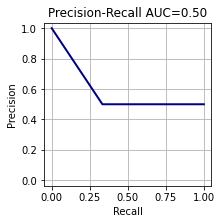

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
#https://blog.paperspace.com/mean-average-precision/

y_scores  = [0,1,1,0,0,0] 
y_true    = [0,1,0,0,1,1]

#terhadap kelas 0 atau negatif
#tp , tn  ,fn  , tp  , fp  , fp      tp=2,fn=1,fp=2,tn=1  
#precision = tp/tp+fp = 2/2+2=0.5         recall = tp/tp+fn = 2/2+1= 0.67
#fscore = 2*(recall*precision)/(recall+precision)= 2*(0.5*0.67)/(0.5+0.67)=0.57



#terhadap kelas 1 atau positif
#tn , tp ,  fp , tn  , fn  , fn      tp=1,fn=2,fp=1,tn=2  
#precision = tp/tp+fp = 1/1+1=0.5         recall = tp/tp+fn = 1/1+2= 0.3333
#fscore = 2*(recall*precision)/(recall+precision)= 2*(0.5*0.3333)/(0.5+0.3333)=0.4

#brarti recall(n)-(recall(n-1))=[0.33-0,0.67-0.33]=[0.33,0.33]
#avg = 0.5*0.33+0.5*0.33=0.33
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_scores, target_names=target_names))
avg=average_precision_score(y_true, y_scores)

precision, recall, threshold = precision_recall_curve(y_true, y_scores)
print('recall',recall)
print('precision',precision)
print(threshold)
AP = numpy.sum((recall[:-1] - recall[1:]) * precision[:-1])
print(AP)
print(avg)
print(recall[:-1])
print(recall[1:])
print(recall[:-1] - recall[1:])

size=3
plt.figure(figsize=(size, size))
plt.axis('equal')
plt.plot(recall, precision, lw=2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.grid()
plt.title('Precision-Recall AUC={0:0.2f}'.format(average_precision_score(y_true, y_scores)))
plt.show()

array recall dan precision sudah benar

              precision    recall  f1-score   support

     class 0       1.00      0.50      0.67         2
     class 1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

              precision    recall  f1-score   support

     class 0       0.50      0.50      0.50         2
     class 1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

recall [1.  0.5 0.5

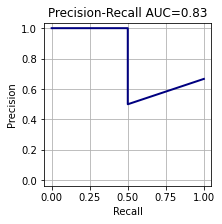

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
#https://stats.stackexchange.com/questions/394494/calculating-sklearns-average-precision-by-hand


target_names = ['class 0', 'class 1']
#threshold 0.35
predict = np.array([0,1,1,1])
print(classification_report(y_true, predict, target_names=target_names))

#threshold 0.4
predict = np.array([0,1,0,1])
print(classification_report(y_true, predict, target_names=target_names))

#threshold 0.8
predict = np.array([0,0,0,1])
print(classification_report(y_true, predict, target_names=target_names))

avg=average_precision_score(y_true, y_scores)  # doctest: +ELLIPSIS
precision, recall, threshold = precision_recall_curve(y_true, y_scores)
print('recall',recall)
print('precision',precision)

print(threshold)
AP = numpy.sum((recall[:-1] - recall[1:]) * precision[:-1])
print('AP',AP)
print('avg',avg)
#beda ternyata
#https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248#:~:text=The%20precision%2Drecall%20curve%20is%20constructed%20by%20calculating%20and%20plotting,belonging%20to%20the%20positive%20class.

size=3
plt.figure(figsize=(size, size))
plt.axis('equal')
plt.plot(recall, precision, lw=2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.grid()
plt.title('Precision-Recall AUC={0:0.2f}'.format(average_precision_score(y_true, y_scores)))
plt.show()

# **FILTER GAMBAR**

In [ ]:
import re

txt = "6_c3s3_1467.jpg"

#Check if the string contains "ai" followed by 1 or more "x" characters:

x = re.match("[\w]+\.(?:"+"jpg"+ ")", txt)
#\w artinya deteksi semua tipe word
#+ artinya satu atau lebih
#. artinya tipe apapun dalam hal ini adalah titik
#(Obscure optional feature: Sometimes you have paren ( ) groupings in the pattern, but which you do not want to extract. 
#In that case, write the parens with a ?: at the start, e.g. (?: ) and that left paren will not count as a group result.)
print(x)

if x:
  print("Yes, there is at least one match!")
else:
  print("No match")

<re.Match object; span=(0, 15), match='6_c3s3_1467.jpg'>
Yes, there is at least one match!


# **MODEL**

In [ ]:
!git clone https://gitlab.com/niko_christian/HarimauTA.git

Cloning into 'HarimauTA'...
remote: Enumerating objects: 529, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 529 (delta 40), reused 50 (delta 35), pack-reused 469
Receiving objects: 100% (529/529), 1.05 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (332/332), done.


In [ ]:
%cd /content/HarimauTA/
from network50 import CVWC50
model= CVWC50()
print(model)


/content/HarimauTA


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth



CVWC50(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64,

In [ ]:
from torchvision.models.resnet import resnet50, Bottleneck
import copy
import torch.nn as nn
resnet = resnet50(pretrained=True)
backbone = nn.Sequential(
            resnet.conv1,
            resnet.bn1,
            resnet.relu,
            resnet.maxpool,
            resnet.layer1,
            resnet.layer2,
            resnet.layer3[0],
        )
print(backbone)

res_conv4 = nn.Sequential(*resnet.layer3[1:])

res_g_conv5 = resnet.layer4

res_p_conv5 = nn.Sequential(
            Bottleneck(1024, 512, downsample=nn.Sequential(nn.Conv2d(1024, 2048, 1, bias=False), nn.BatchNorm2d(2048))),
            Bottleneck(2048, 512),
            Bottleneck(2048, 512))
res_p_conv5.load_state_dict(resnet.layer4.state_dict())

g = nn.Sequential(copy.deepcopy(res_conv4), copy.deepcopy(res_g_conv5))
print(g)     

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
%cd /content/HarimauTA/
from networkmulti import CVWC
model= CVWC()
print(model)

/content/HarimauTA
CVWC(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [ ]:
import torch
import torch.nn as nn
from torchvision.models.resnet import resnet50, Bottleneck
resnet = resnet50(pretrained=True)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch
import torch.nn as nn

from torchvision import models
model = models.densenet121(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
from networkdensenet121 import Dense121
from networkdensenet169 import Dense169
from networkdensenet201 import Dense201
model121= Dense121()
print(model121)
model169= Dense169()
print(model169)
model201=Dense201()
print(model201)

Dense121(
  (model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1,

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth



Dense169(
  (model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1

In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-cp37-none-any.whl size=16443 sha256=91e2ea671307137c3cda9da052ee05a73ac2d0d19a89d1ed4d09a786f057b4bd
  Stored in directory: /root/.cache/pip/wheels/84/27/aa/c46d23c4e8cc72d41283862b1437e0b3ad318417e8ed7d5921
Successfully built efficientnet-pytorch


In [ ]:
from networkefb0 import EFB0
modelefb0= EFB0()
print(modelefb0)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0
EFB0(
  (model): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_pad

In [ ]:
from efficientnet_pytorch import EfficientNet
efiB0=EfficientNet.from_pretrained('efficientnet-b0')
print(efiB0)

Loaded pretrained weights for efficientnet-b0
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dS

In [ ]:
from efficientnet_pytorch import EfficientNet
efiB0=EfficientNet.from_pretrained('efficientnet-b1')
print(efiB0)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth



Loaded pretrained weights for efficientnet-b1
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2d